In [2]:
import requests
import json
from numerize import numerize
from matplotlib import pyplot as plt

In [3]:
polite = 'mailto=udevz@student.kit.edu'

In [4]:
# define request function for convenience.
# Concatenates request and polite header, sends request and returns response in JSON

def request(api_call):
    req_string = str(api_call+'&'+polite)
    req = requests.get(req_string)
    if req.status_code == 200:
        return req.json()
    else:
        print('Request not successful ', req.status_code)
        return

In [5]:
def random_concept():
    return request('https://api.openalex.org/concepts/random?')

In [5]:
# check concept analysis

req_json = request('https://api.openalex.org/concepts?')
total_count = req_json['meta']['count']
print('Concept count total: ',numerize.numerize(total_count)) # ~124.07K am 24. Juni
print('Concept count total: ',(total_count))

Concept count total:  65.07K
Concept count total:  65073


In [6]:
# show most frequent level-0 concepts

req_json = request('https://api.openalex.org/concepts?')
concept_count = dict()

for n in req_json['results']:
    if n['level'] == 0:
        name = n['display_name']
        count = n['works_count']
        concept_count[name] = count
concept_count

{'Computer science': 41363895,
 'Medicine': 37697170,
 'Chemistry': 21071084,
 'Psychology': 17852796,
 'Biology': 17354067,
 'Political science': 16567417,
 'Materials science': 16311513,
 'Art': 12891102,
 'Business': 12188456,
 'Geography': 11980631,
 'Physics': 11142065,
 'Environmental science': 10221266,
 'Mathematics': 9199259,
 'Philosophy': 8270967,
 'Sociology': 7721628,
 'History': 7142140,
 'Geology': 7042729,
 'Engineering': 5982499,
 'Economics': 4180305}

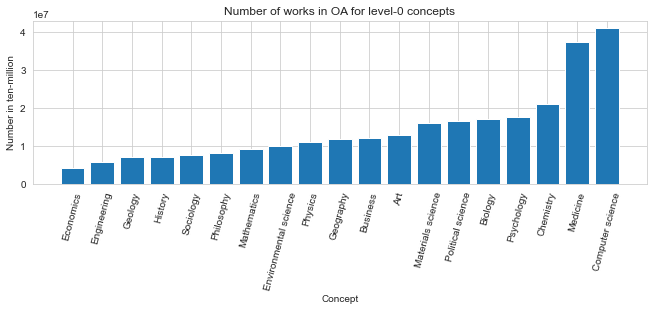

In [7]:
concept_count_sorted = sorted(concept_count.items(), key=lambda x: x[1])

plt.bar(*zip(*concept_count_sorted))
plt.title('Number of works in OA for level-0 concepts')
plt.xlabel('Concept')
plt.ylabel('Number in ten-million')
plt.xticks(rotation=75)
plt.gcf().set_size_inches((11, 3))
plt.show()

In [14]:
# find number of papers in computer science that were published this year
cs_id = 'C41008148'

for year in range(2010,2023):
    req_json = request(f'https://api.openalex.org/works?filter=concepts.id:C41008148,publication_year:{year}')
    print(year,":",req_json['meta']['count'])


2010 : 1482849
2011 : 1691460
2012 : 1700095
2013 : 1835011
2014 : 1939938
2015 : 1966777
2016 : 1951006
2017 : 1981909
2018 : 1978800
2019 : 2018872
2020 : 2246228
2021 : 1997918
2022 : 1140187


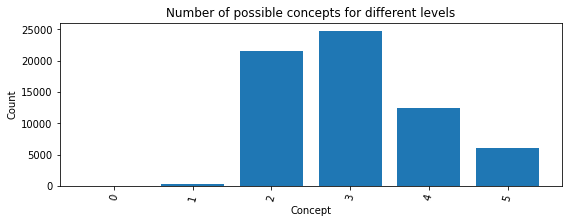

[('0', 19), ('1', 284), ('2', 21460), ('3', 24768), ('4', 12406), ('5', 6136)]


In [8]:
level_count_sorted = sorted(level_count.items(), key=lambda x: x[0])

plt.bar(*zip(*level_count_sorted))
plt.title('Number of possible concepts for different levels')
plt.xlabel('Concept')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.gcf().set_size_inches((9, 3))
plt.show()
print(level_count_sorted)

In [7]:
# most cited level-0 concepts
req_json = request('https://api.openalex.org/concepts?filter=level:0&sort=cited_by_count:desc')
for c in range(len(req_json['results'])):
    print(req_json['results'][c]['display_name'],':',numerize.numerize(req_json['results'][c]['cited_by_count']))
    #print("Ag. citations per work in ^ this discipline:", (req_json['results'][c]['cited_by_count']/req_json['results'][c]['works_count']))

Medicine : 385.22M
Biology : 366.11M
Chemistry : 341.15M
Computer science : 221.1M
Materials science : 199.04M
Psychology : 159.81M
Physics : 113.48M
Mathematics : 86.29M
Environmental science : 78.72M
Business : 56.73M
Geology : 50.64M
Geography : 42.05M
Economics : 42.02M
Sociology : 41.79M
Political science : 40.23M
Engineering : 34.64M
Philosophy : 14.56M
History : 12.92M
Art : 8.77M


In [9]:
req_json = request('https://api.openalex.org/concepts?filter=level:0&sort=cited_by_count:desc')
for i in req_json['results']:
    print(i['display_name'])

Medicine
Biology
Chemistry
Computer science
Materials science
Psychology
Physics
Mathematics
Environmental science
Business
Geology
Sociology
Geography
Political science
Economics
Engineering
History
Philosophy
Art


In [8]:
# most cited level-1 concepts
req_json = request('https://api.openalex.org/concepts?filter=level:1&sort=cited_by_count:desc')
for c in range(5):
    print(req_json['results'][c]['display_name'],':',numerize.numerize(req_json['results'][c]['cited_by_count']))

Internal medicine : 177.79M
Cell biology : 107.05M
Biochemistry : 84.09M
Endocrinology : 73.75M
Genetics : 71.08M
